In [1]:
#requried imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [23]:
#importing data

df = pd.read_csv('./winequality/winequality-red.csv')
#print(df.head())

len(df)

1599

In [26]:
row_sums = df.sum(axis=1)
row_means = row_sums / df.shape[1]

#row_means.head()
df['total_score'] = row_means
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,6.211983
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,10.254567
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.308250
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,9.296083
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,6.211983


In [27]:
#investigation of dataset using presets

#df.info()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.0,0.270976,0.194801,0.00000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.0,0.087467,0.047065,0.01200,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.000000,38.000000,62.000000,289.000000
density,1599.0,0.996747,0.001887,0.99007,0.995600,0.996750,0.997835,1.003690
pH,1599.0,3.311113,0.154386,2.74000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.0,0.658149,0.169507,0.33000,0.550000,0.620000,0.730000,2.000000


0     6.211983
1    10.254567
2     8.308250
3     9.296083
4     6.211983
dtype: float64

In [28]:
#removing all null values from the set

#df.isnull().sum()

for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())
 
df.isnull().sum().sum()

0

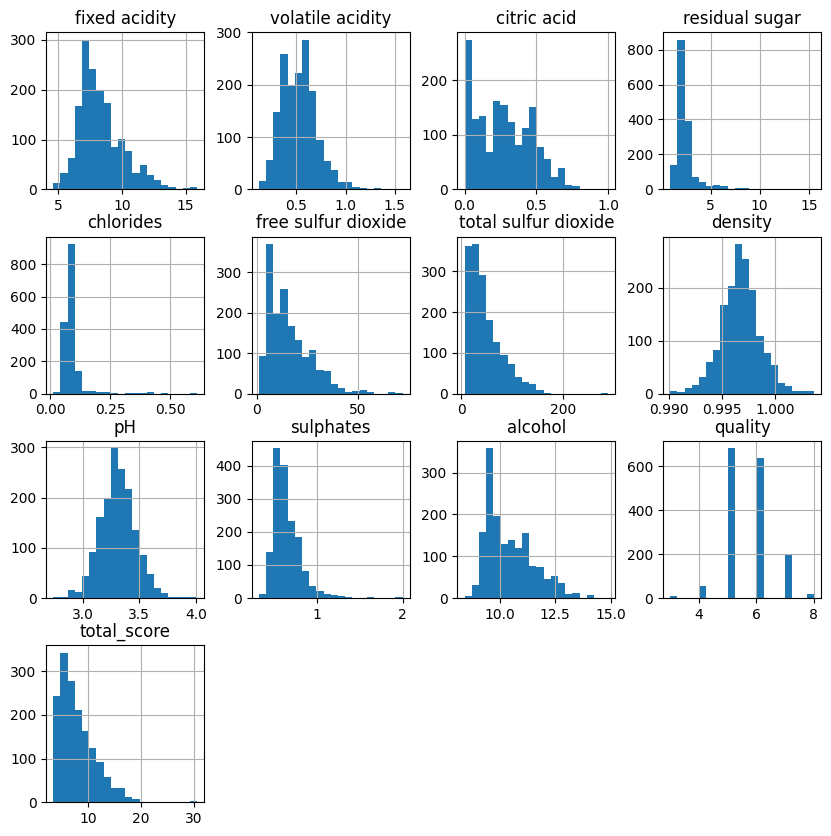

In [29]:
#histrogram to visualize the data in  a continuous format for ea. trait

df.hist(bins=20, figsize=(10, 10))
plt.show()

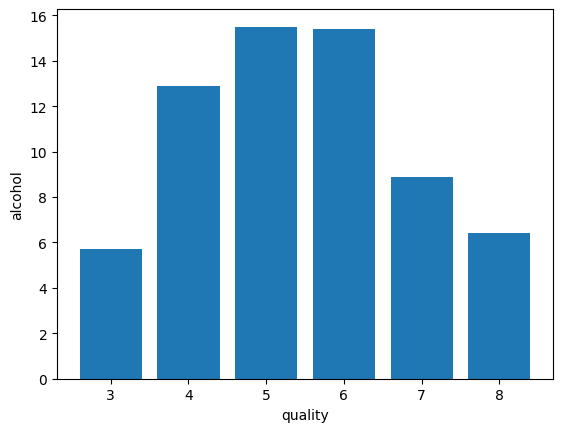

In [6]:

plt.bar(df['quality'], df['residual sugar'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

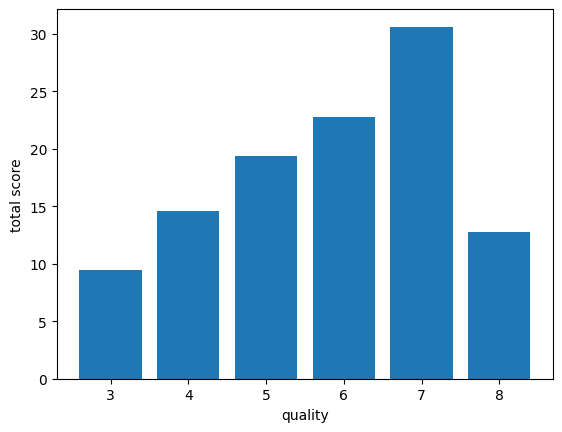

In [30]:
plt.bar(df['quality'], df['total_score'])
plt.xlabel('quality')
plt.ylabel('total score')
plt.show()

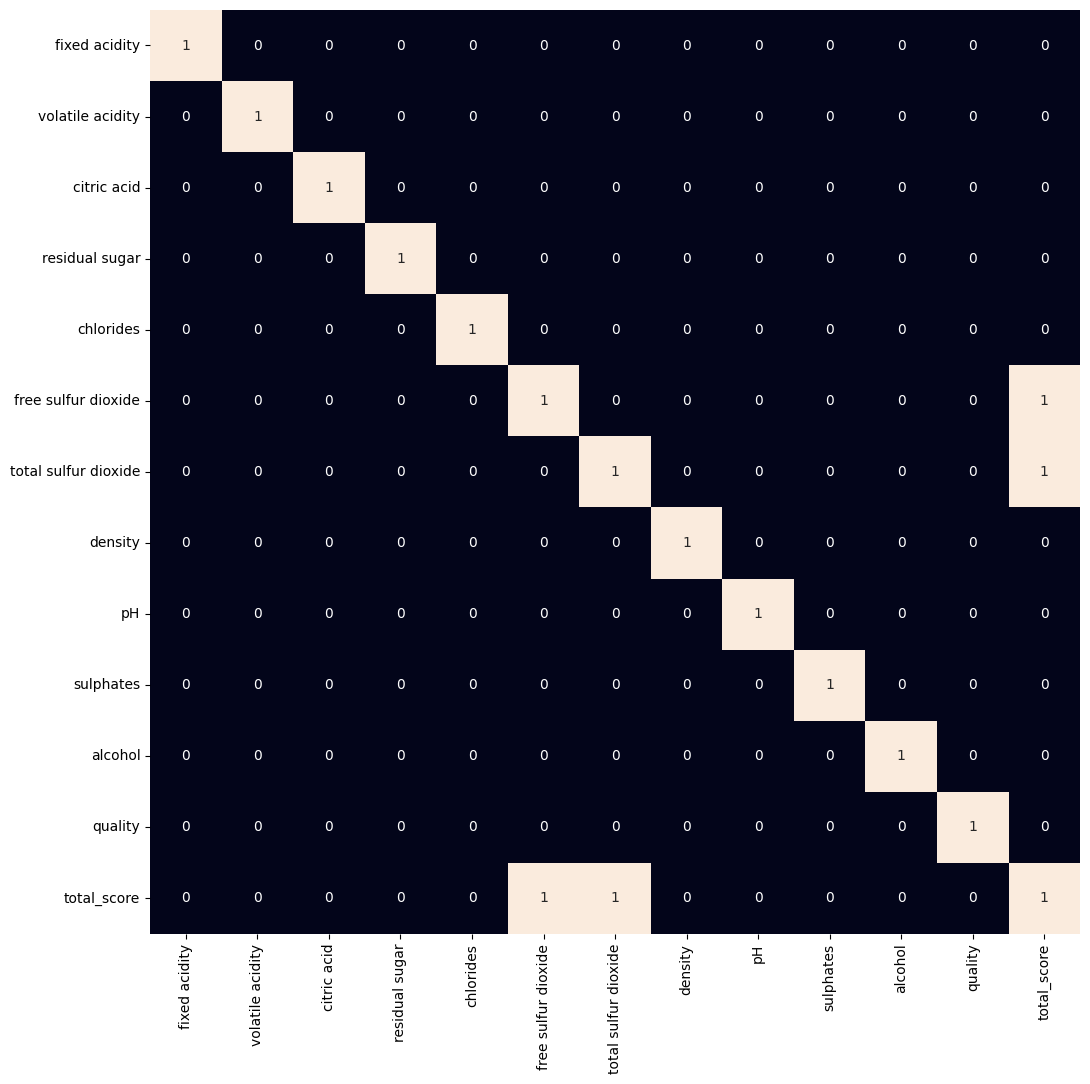

In [33]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.70, annot=True, cbar=False)
plt.show()

In [8]:

df = df.drop('total sulfur dioxide', axis=1)
df = df.drop('citric acid', axis=1)
df = df.drop('density', axis=1)



In [9]:
#prepparing datasets for training
df['best quality'] = [1 if x > 6 else 0 for x in df.quality]


features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((1279, 8), (320, 8))

In [10]:
# normalizing data

norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)



In [11]:

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.5676581907351139
Validation Accuracy :  0.5238970588235294

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7040441176470589

SVC() : 
Training Accuracy :  0.6101737832507064
Validation Accu

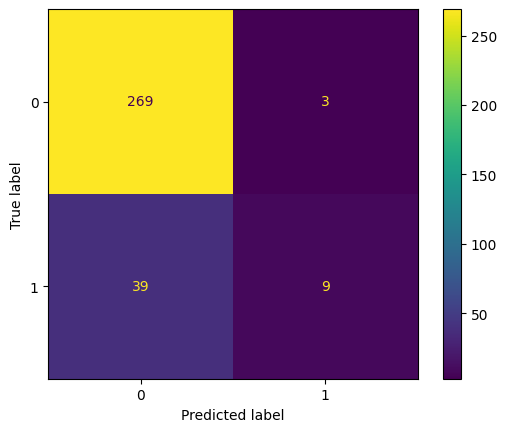

In [12]:
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(xtrain, ytrain)

predictions = clf.predict(xtest)
cm = confusion_matrix(ytest, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

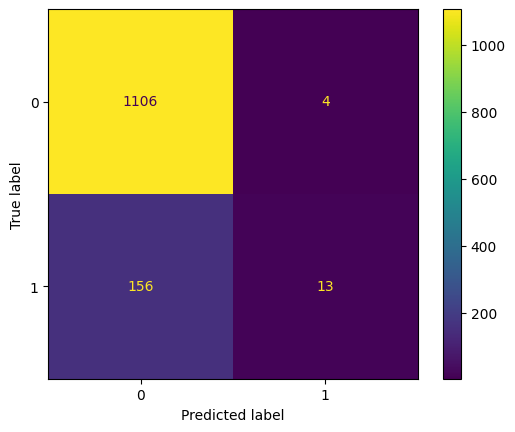

In [13]:
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(xtest, ytest)

predictions = clf.predict(xtrain)
cm = confusion_matrix(ytrain, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [14]:


print(metrics.classification_report(ytest,
                                    models[0].predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       272
           1       0.43      0.06      0.11        48

    accuracy                           0.85       320
   macro avg       0.64      0.52      0.51       320
weighted avg       0.79      0.85      0.80       320



In [15]:
for i in range(3):
    print(models[i])
    print(metrics.classification_report(ytest,
                                    models[i].predict(xtest)))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       272
           1       0.43      0.06      0.11        48

    accuracy                           0.85       320
   macro avg       0.64      0.52      0.51       320
weighted avg       0.79      0.85      0.80       320

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_str

In [16]:
#importing data

df2 = pd.read_csv('./winequality/winequality-white2.csv')
#print(df2.head())

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [17]:
df2.isnull().sum()


# for col in df.columns:
#   if df[col].isnull().sum() > 0:
#     df[col] = df[col].fillna(df[col].mean())
 
# df.isnull().sum().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

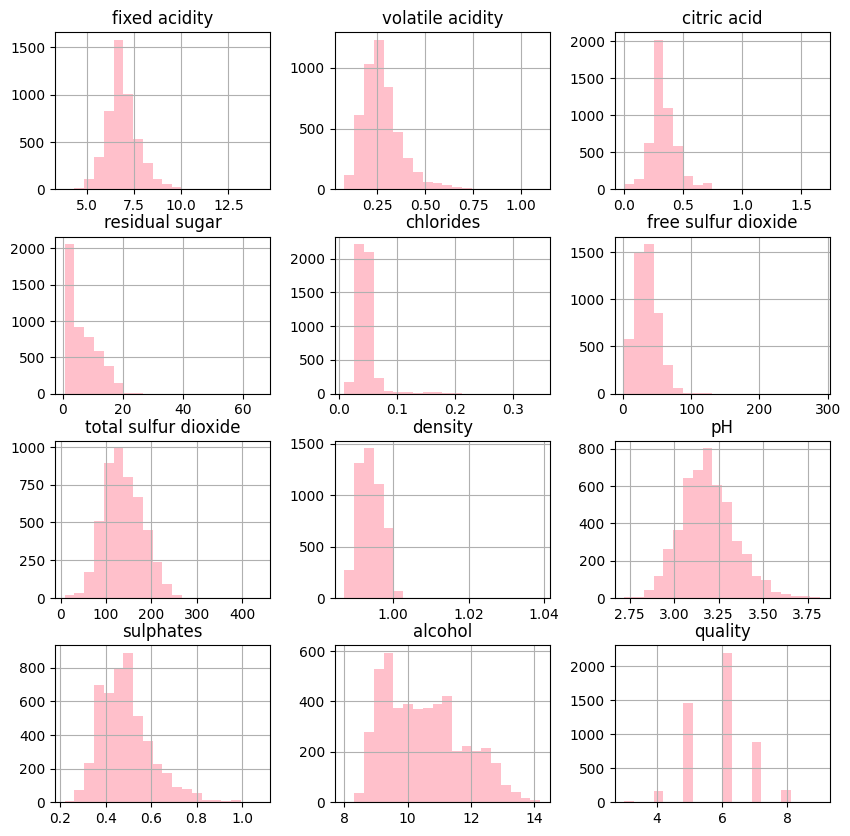

In [18]:
df2.hist(bins=20, figsize=(10, 10), color='pink')
plt.show()

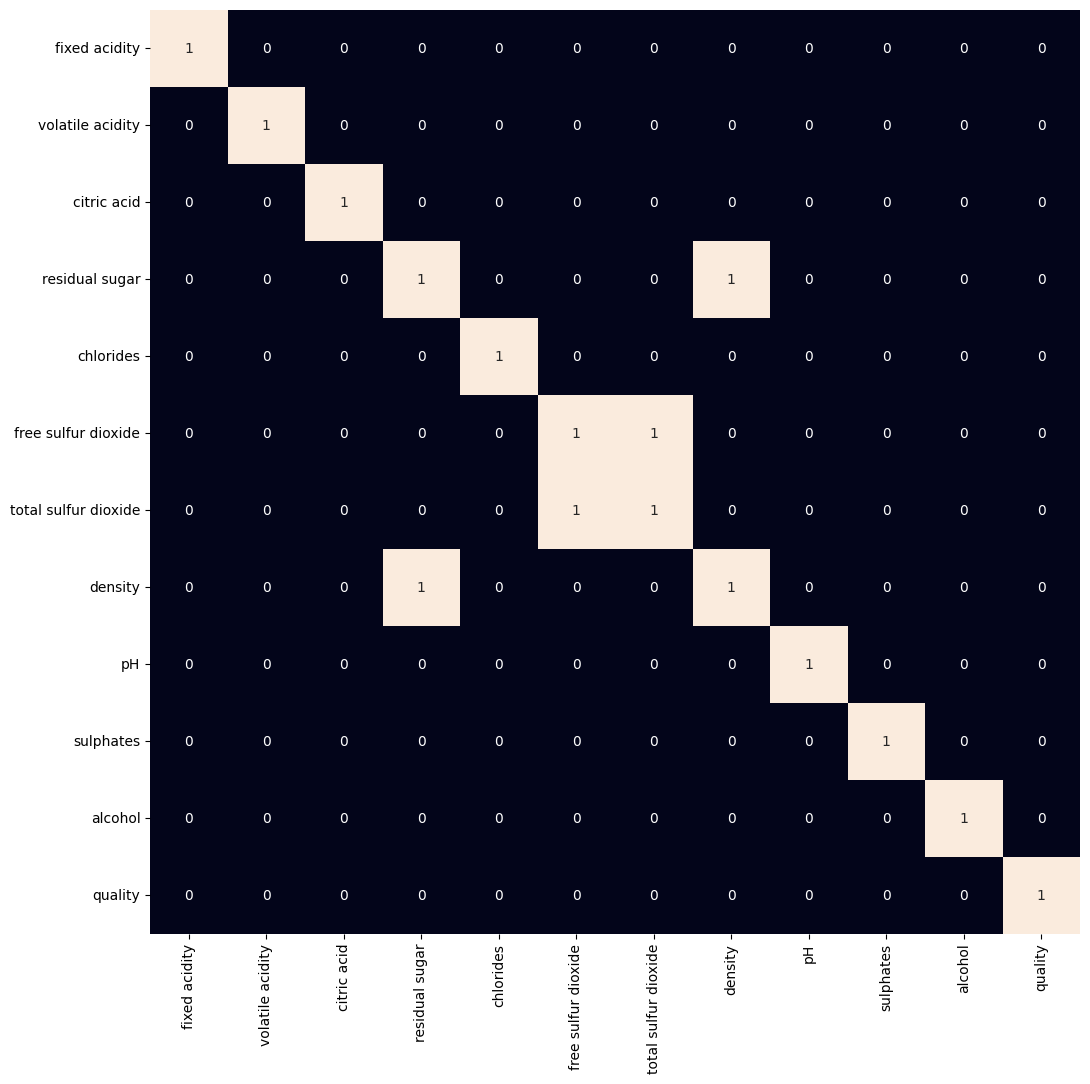

In [19]:
plt.figure(figsize=(12, 12))
sb.heatmap(df2.corr() > 0.6, annot=True, cbar=False)
plt.show()

In [20]:
df2['best quality'] = [1 if x > 6 else 0 for x in df2.quality]


features = df2.drop(['quality', 'best quality'], axis=1)
target = df2['best quality']
 
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain2.shape, xtest2.shape

((3918, 11), (980, 11))

In [21]:
norm = MinMaxScaler()
xtrain2 = norm.fit_transform(xtrain2)
xtest2 = norm.transform(xtest2)

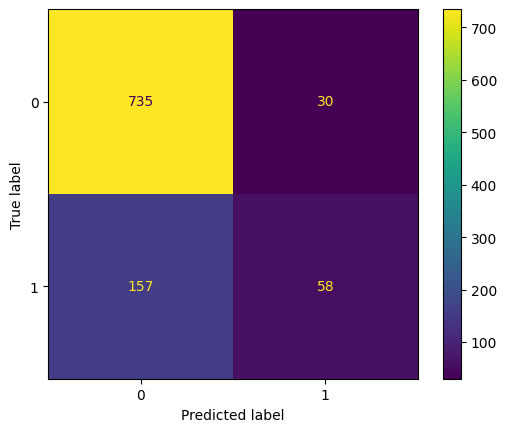

In [22]:
clf = SVC(random_state=0)
clf.fit(xtrain2, ytrain2)

predictions2 = clf.predict(xtest2)
cm2 = confusion_matrix(ytest2, predictions2, labels=clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=clf.classes_)
disp2.plot()

plt.show()